<img src = "website.png">

# Milestones 🏆

## ⦿ Problem Definition

## ⦿ Data Collection and Preprocessing

## ⦿ Data Exploration and Visualization

## ⦿ Feature Engineering

## ⦿ Model Development

## ⦿ Model Evaluation

## ⦿ Deployment and Integration

# Problem Definition

I have obtained a dataset from Kaggle that contains information about real estate properties of USA. The aim of this project is to build a robust predictive model for real estate price prediction based on the given dataset. The model should be capable of accurately estimating the sale price of a property given its characteristics, such as the number of bedrooms, bathrooms, et cetera . The outcome of this project will provide valuable insights to potential buyers, sellers, and real estate professionals by enabling them to make informed decisions regarding property investments.

## Data Dictionary

• Price: price at which house was sold.

• Date: This shows date on which house was sold.

• Bedrooms: The number of bedrooms.

• Bathrooms: The number of bathrooms.

• Sqft_living: living area of the house in 
square feet.

• Sqft_lot: total area of the lot in square 
feet.

• Floors: number of floors in the house.

• Waterfront: binary variable indicating the house is on a waterfront or not.

• View: How good the view of the property is between 0 and 4.

• Condition: The condition of the house between 0 and 5.

• Sqft_above: Apart from the basement The square footage of the house.

• Sqft_basement: Square footage of the basement.

• Yr_built: The year in which the house was built.

• Yr_renovated: The year in which the house was 
renovated.

• Street: street address of the house.

• City: The city of the house

• Statezip: The state and zipcode of the house 
where is located.

• Country: The country of houses (USA).

# Importing Libraries 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [2]:
# Loading the dataset

In [3]:
df0 = pd.read_csv("data.csv")

# Data Overview

In [4]:
df0.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df0.shape

(4600, 18)

## checking the data types of columns

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Data Preprocessing

## Checking the Statistical Summary

In [7]:
df0.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## checking the unique values in each column

In [8]:
df0.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

## Making a list of all categorical variables

In [9]:
cat_col = ['city','bathrooms', 'bedrooms', 'sqft_living','condition','yr_built','yr_renovated','floors','sqft_above','waterfront','street','statezip']

#print number of count of each unique value in each columns
for column in cat_col:
    print(df0[column].value_counts())
    print("-" * 45)

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

## Rounding the Float values of bedrooms, bathrooms, floors

In [10]:
df1 = df0.copy()
df1['bedrooms'] = df1['bedrooms'].apply(lambda x: round(x))
df1['bathrooms'] = df1['bathrooms'].apply(lambda x: round(x))
df1['floors'] = df1['floors'].apply(lambda x: round(x))

## Dropping the rows

Dropping the rows of condiion column having values 1 and 2, assigning 1, 2, and 3 to the rows having 3, 4 and 5

1 -> Excellent

2 -> Average

3 -> Poor

In [11]:
df1 = df1[df1['condition'].isin([5,4,3])]  # Drop rows with condition values 1 and 2

df1['condition'] = df1['condition'].replace({5: 1, 4: 2, 3: 3})  # Assign new values to remaining numbers

In [12]:
df1['condition'].value_counts()

condition
3    2875
2    1252
1     435
Name: count, dtype: int64

Dropping the rows having 3 and 4 floors 

In [13]:
df1 = df1[df1['floors'].isin([1,2])]

In [14]:
df1['floors'].value_counts()

floors
2    2288
1    2144
Name: count, dtype: int64

Dropping the rows having more than 6 bedrooms

In [15]:
df1 = df1[df1['bedrooms'].isin([1,2,3,4,5,6])]

In [16]:
df1['bedrooms'].value_counts()

bedrooms
3    1930
4    1512
2     534
5     349
6      57
1      33
Name: count, dtype: int64

Dropping the rows having more than 6 bedrooms

In [17]:
df1 = df1[df1['bathrooms'].isin([1,2,3,4,5,6])]

In [18]:
df1['bathrooms'].value_counts()

bathrooms
2    2842
1     739
3     555
4     255
5      17
6       6
Name: count, dtype: int64

## Dropping unnecessary columns

In [19]:
df2 = df1.drop(['yr_built','yr_renovated','street','statezip','sqft_basement','sqft_above','view','country','date'], axis='columns')

In [20]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,city
0,313000.0,3,2,1340,7912,2,0,3,Shoreline
1,2384000.0,5,2,3650,9050,2,0,1,Seattle
2,342000.0,3,2,1930,11947,1,0,2,Kent
3,420000.0,3,2,2000,8030,1,0,2,Bellevue
4,550000.0,4,2,1940,10500,1,0,2,Redmond


## checking the missing values

In [21]:
df2.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
city           0
dtype: int64

## Removing Duplicates

In [22]:
df2.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,city
0,3.130000e+05,3,2,1340,7912,2,0,3,Shoreline
1,2.384000e+06,5,2,3650,9050,2,0,1,Seattle
2,3.420000e+05,3,2,1930,11947,1,0,2,Kent
3,4.200000e+05,3,2,2000,8030,1,0,2,Bellevue
4,5.500000e+05,4,2,1940,10500,1,0,2,Redmond
...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,2,1510,6360,1,0,2,Seattle
4596,5.343333e+05,3,2,1460,7573,2,0,3,Bellevue
4597,4.169042e+05,3,2,3010,7014,2,0,3,Renton
4598,2.034000e+05,4,2,2090,6630,1,0,3,Seattle


## Removing Rows Having Price = 0

In [23]:
(df2.price == 0).sum()

47

Price of 47 houses is 0, price can not be zero, we consider them missing values 

In [24]:
df3 = df2[df2['price']!=0]

In [25]:
df3.shape

(4367, 9)

## Changing the Data Types of Columns

In [26]:
df4 = df3.copy()
df4["floors"] = df4["floors"].astype("int64")
df4["bedrooms"] = df4["bedrooms"].astype("int64")
df4['bathrooms'] = df4['bathrooms'].astype("int64")
df4['city']      = df4['city'].astype('string')

In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4367 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4367 non-null   float64
 1   bedrooms     4367 non-null   int64  
 2   bathrooms    4367 non-null   int64  
 3   sqft_living  4367 non-null   int64  
 4   sqft_lot     4367 non-null   int64  
 5   floors       4367 non-null   int64  
 6   waterfront   4367 non-null   int64  
 7   condition    4367 non-null   int64  
 8   city         4367 non-null   string 
dtypes: float64(1), int64(7), string(1)
memory usage: 341.2 KB


## Adding new columns in dataset

In [28]:
df4['total_square_feet'] = df4['sqft_living'] + df4['sqft_lot']
df4['price_per_square_feet'] = df4['price'] / df4['total_square_feet']

In [29]:
df4.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,city,total_square_feet,price_per_square_feet
0,313000.0,3,2,1340,7912,2,0,3,Shoreline,9252,33.830523
1,2384000.0,5,2,3650,9050,2,0,1,Seattle,12700,187.716535
2,342000.0,3,2,1930,11947,1,0,2,Kent,13877,24.645096


# Handling Outliers

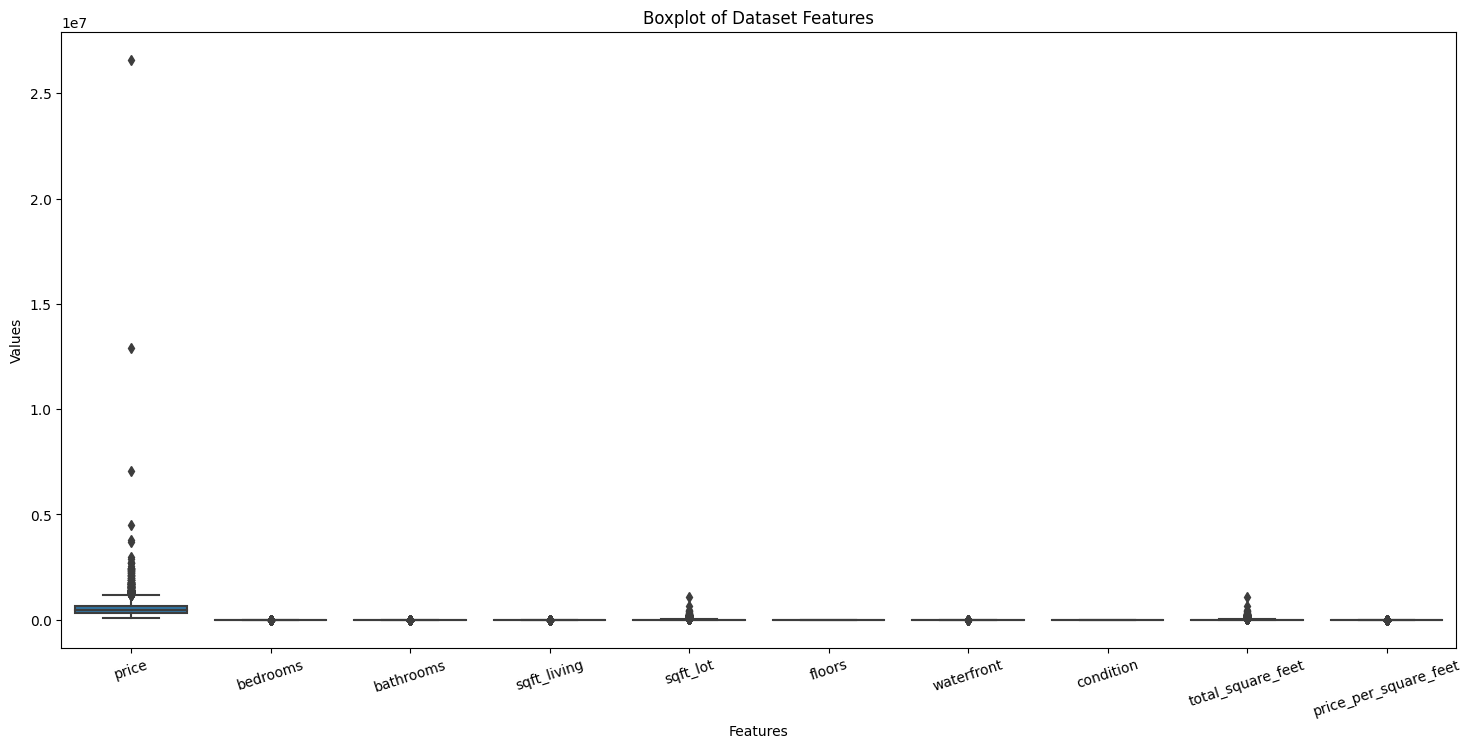

In [30]:
df5 = df4.copy()

# Select the features for boxplot
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'city', 'total_square_feet', 'price_per_square_feet']

# Create a DataFrame containing the selected features
data = df5[features]

# Create the boxplot
plt.figure(figsize=(18,8))
sn.boxplot(data=data)
plt.xticks(rotation=18)
plt.title('Boxplot of Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

## Removing outliers using IQR
1. Calculate Q1(25%) and Q2 (75%)
2. IQR (Q3 - Q1)
3. Find the Lower Fence => Q1-1.5(IQR)
4. Find the Higher Fence => Q3 + 1.5 (IQR)

In [31]:
df5.shape

(4367, 11)

### Outliers in Price Column

In [32]:
q1,q3 = np.percentile(df5.price,[25,75])
print(q1,q3)

325000.0 660000.0


In [33]:
iqr = q3 - q1 

In [34]:
#Finding lower fence and upper fence

lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

-177500.0 1162500.0


In [35]:
outliers = df5[(df5.price>upper_fence) | (df5.price<lower_fence)]
len(outliers)

223

## Dataframe without outliers

In [36]:
df6 = df5[(df5.price<upper_fence) & (df5.price>lower_fence)]
df6.shape

(4144, 11)

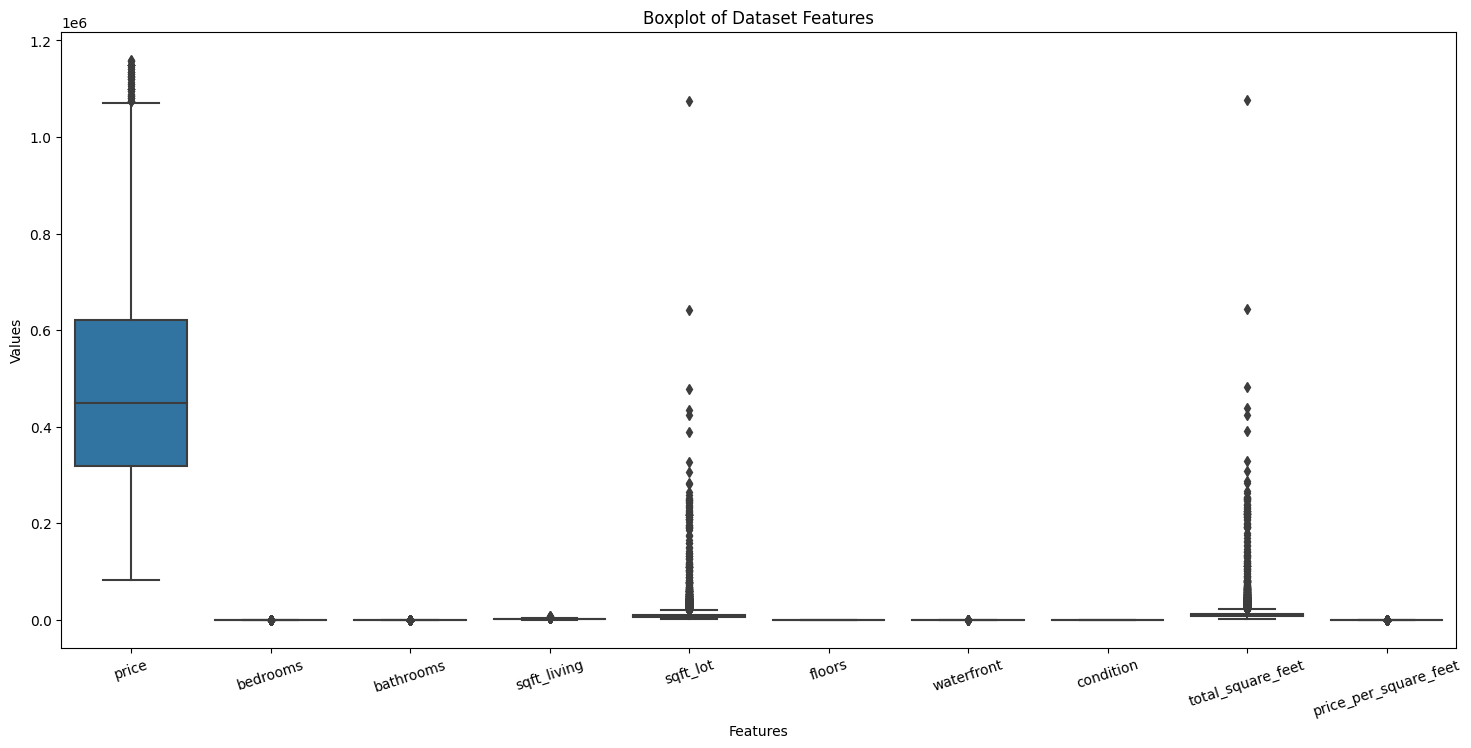

In [37]:
# Select the features for boxplot
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'city', 'total_square_feet', 'price_per_square_feet']

# Create a DataFrame containing the selected features
data = df6[features]

# Create the boxplot
plt.figure(figsize=(18, 8))
sn.boxplot(data=data)
plt.xticks(rotation=18)
plt.title('Boxplot of Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

In [38]:
df6.price

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4144, dtype: float64

# Exploratory Data Analysis (EDA) 

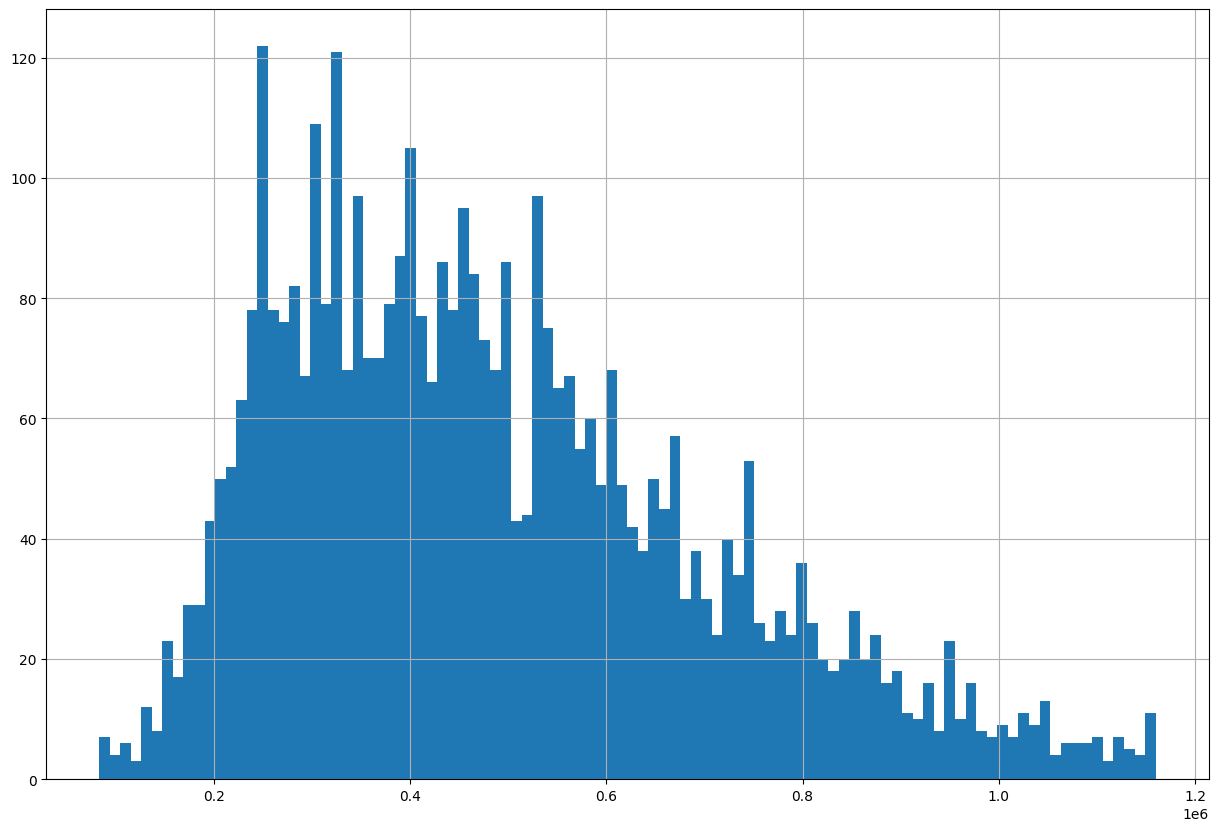

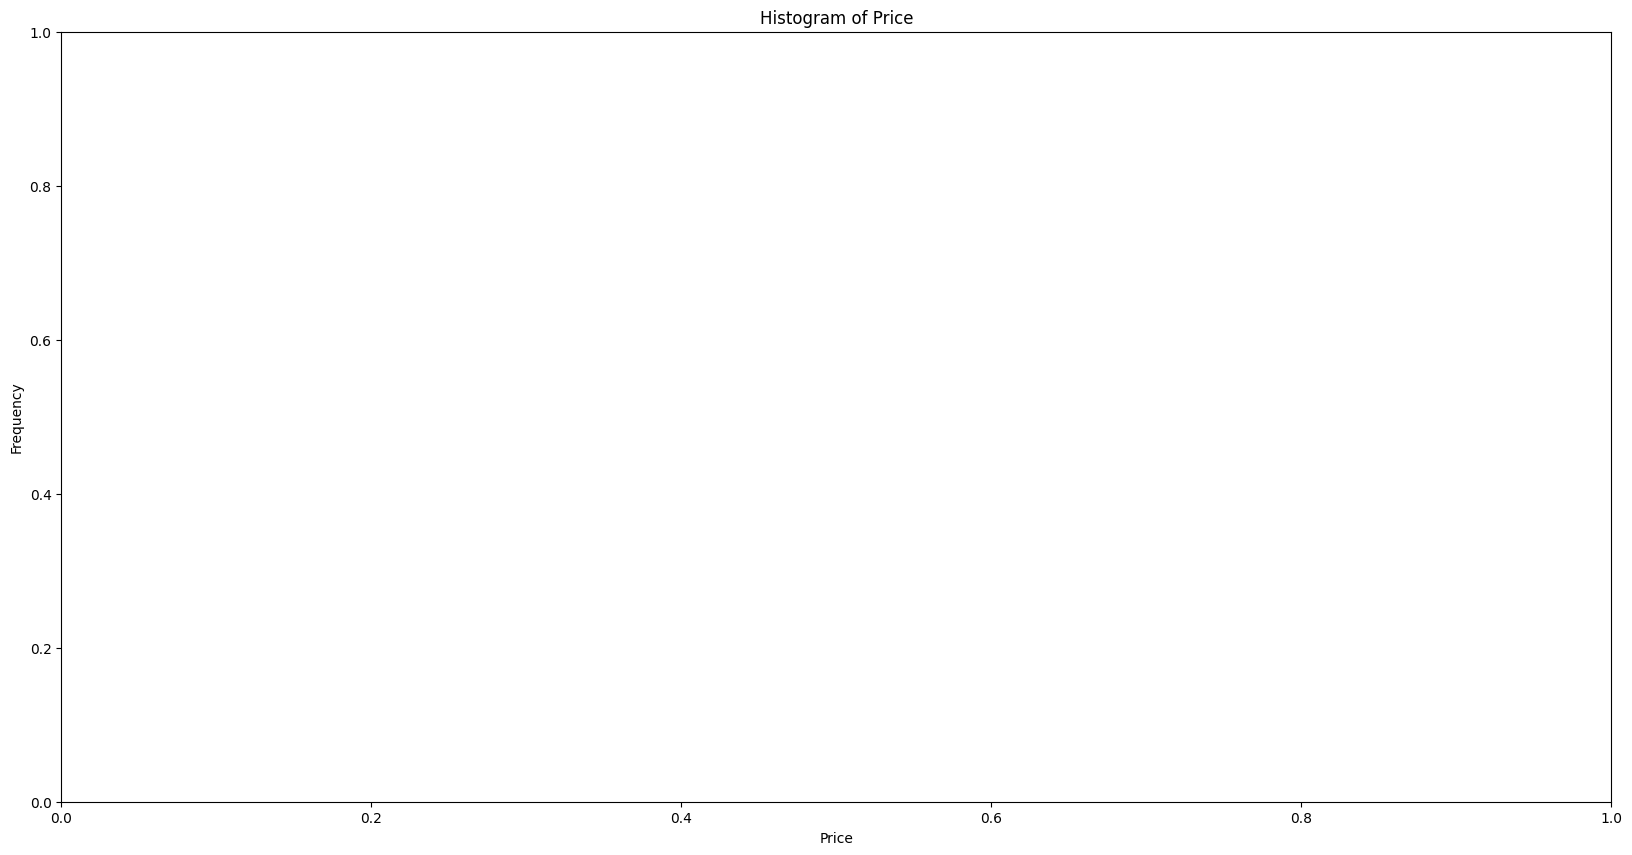

In [80]:
df6['price'].hist(bins=100)
plt.figure(figsize=(20, 10))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

<Axes: xlabel='price', ylabel='Density'>

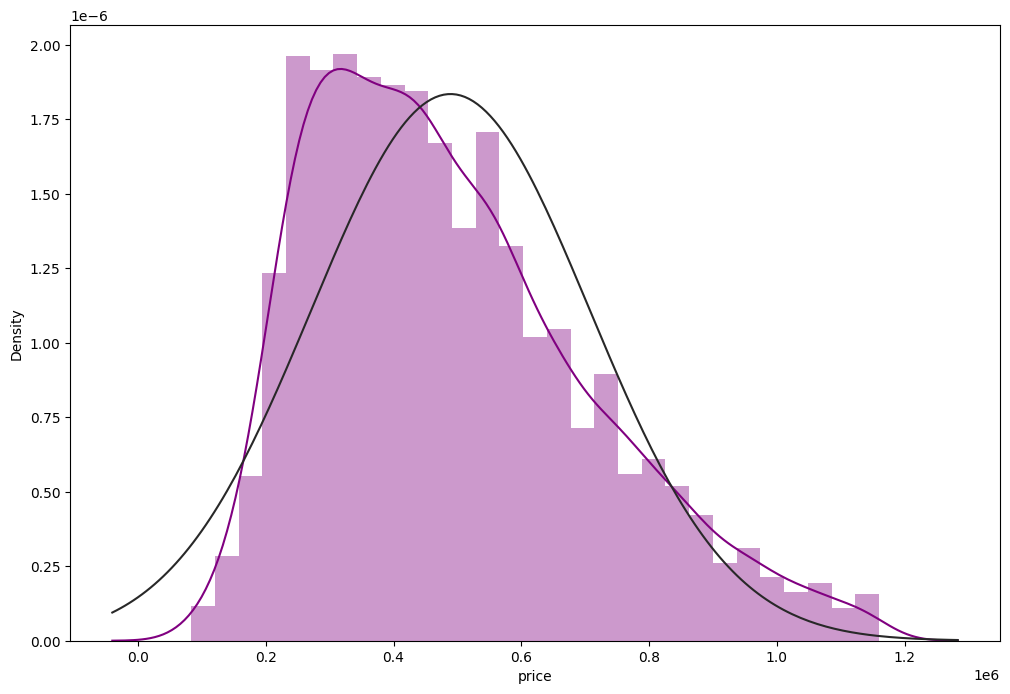

In [40]:
plt.figure(figsize=(12, 8))
sn.distplot(df6['price'],color="purple",kde=True , fit=stats.norm)


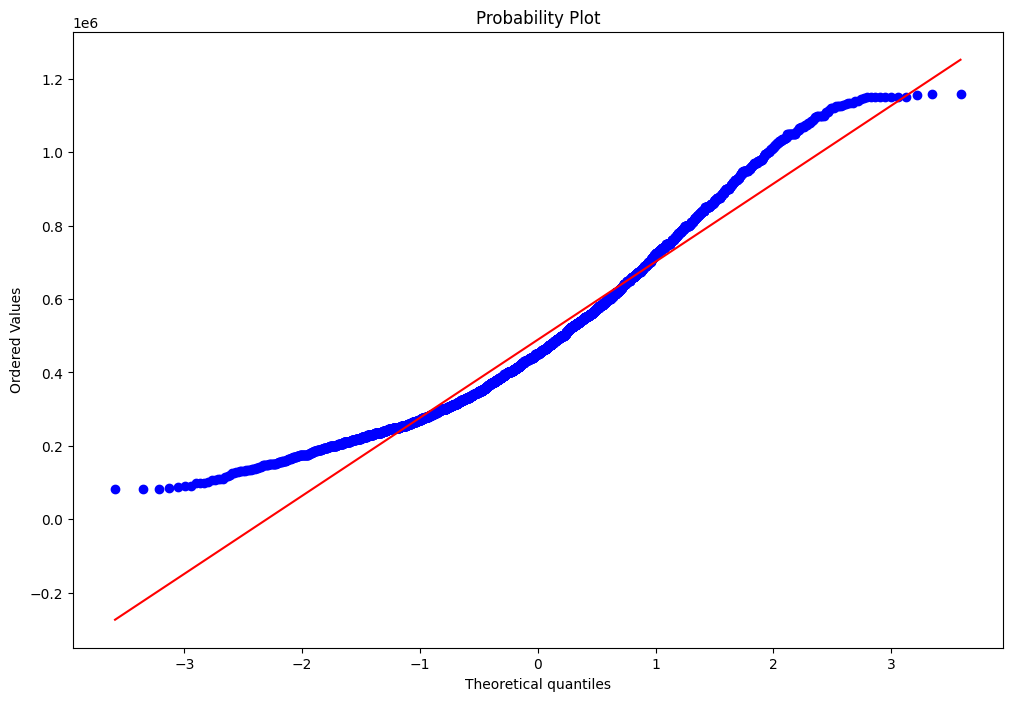

In [41]:
plt.figure(figsize=(12, 8))
res = stats.probplot(df6['price'], plot=plt)
plt.show()


## Correlation between different features

In [42]:
numeric_columns = df6.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df6[numeric_columns].corr()

In [43]:
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,total_square_feet,price_per_square_feet
price,1.000000,0.314606,0.448596,0.634593,0.105904,0.311421,0.072724,-0.026665,0.119625,0.399170
bedrooms,0.314606,1.000000,0.476301,0.593112,0.064975,0.225772,-0.035250,0.005547,0.077966,-0.111925
bathrooms,0.448596,0.476301,1.000000,0.658899,0.100297,0.314721,0.025864,0.088564,0.114591,0.090166
sqft_living,0.634593,0.593112,0.658899,1.000000,0.206999,0.389458,0.025389,0.115320,0.228425,-0.073543
sqft_lot,0.105904,0.064975,0.100297,0.206999,1.000000,0.039476,0.024576,-0.012618,0.999759,-0.301483
floors,0.311421,0.225772,0.314721,0.389458,0.039476,1.000000,0.015534,0.246648,0.048022,0.280427
waterfront,0.072724,-0.035250,0.025864,0.025389,0.024576,0.015534,1.000000,-0.020560,0.025025,-0.040531
condition,-0.026665,0.005547,0.088564,0.115320,-0.012618,0.246648,-0.020560,1.000000,-0.009969,0.023085
total_square_feet,0.119625,0.077966,0.114591,0.228425,0.999759,0.048022,0.025025,-0.009969,1.000000,-0.301661
price_per_square_feet,0.399170,-0.111925,0.090166,-0.073543,-0.301483,0.280427,-0.040531,0.023085,-0.301661,1.000000


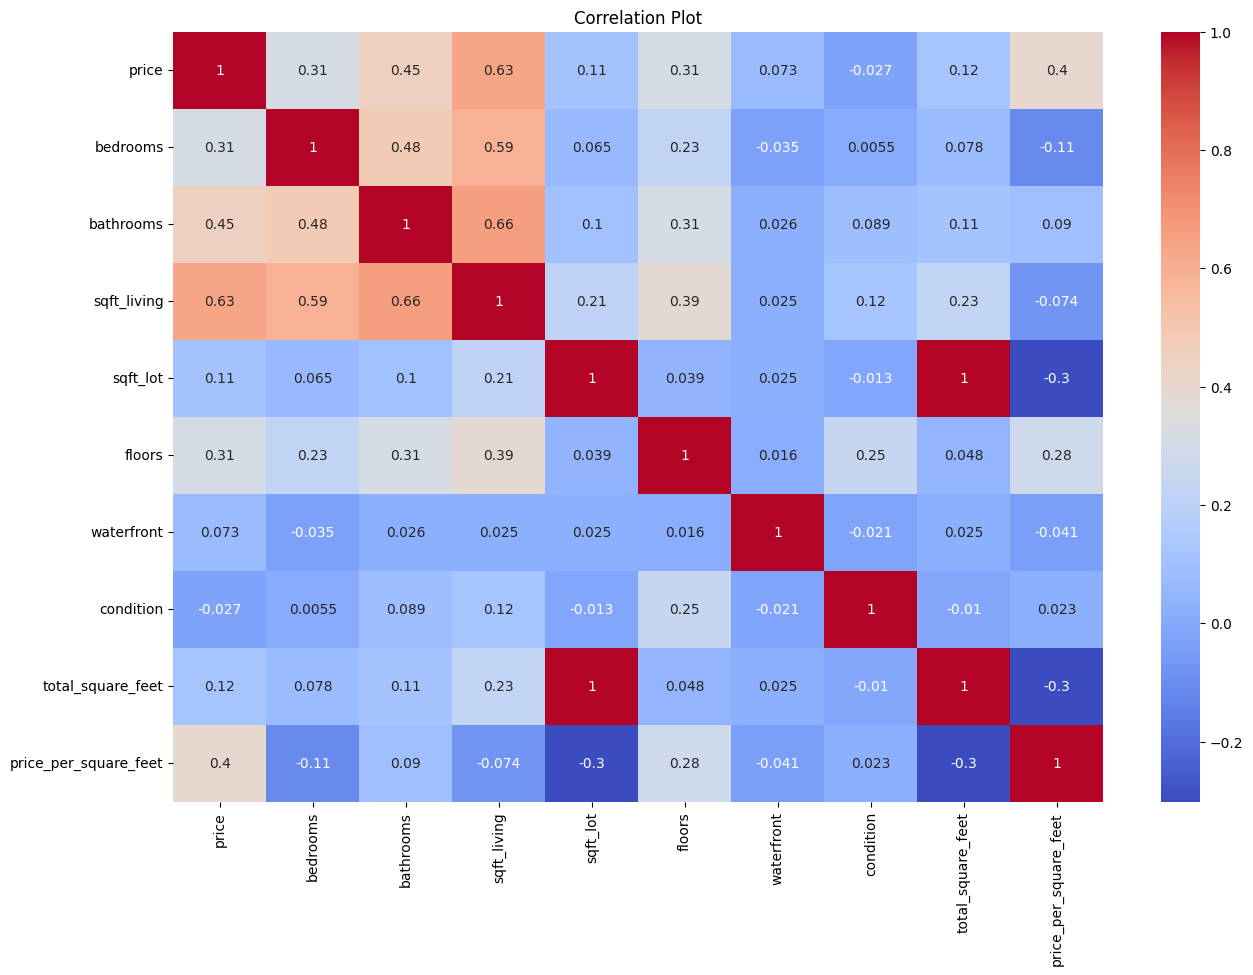

In [44]:
plt.figure(figsize=(15, 10))
sn.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title("Correlation Plot")
plt.show()

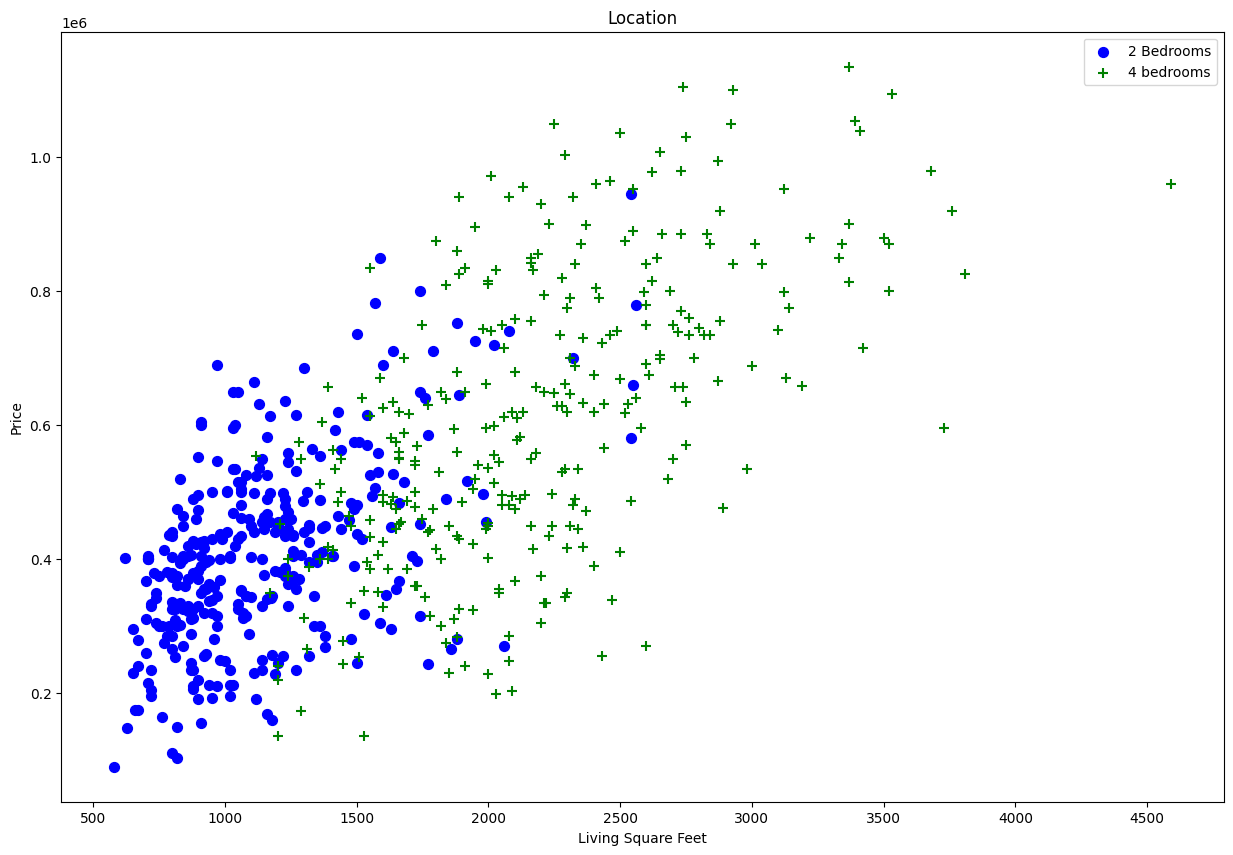

In [45]:
def plot_scatter_chart(df,city):
    br2 = df[(df6.city==city) & (df6.bedrooms==2)]
    br4 = df[(df6.city==city) & (df6.bedrooms==4)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(br2.sqft_living,br2.price, color='Blue', label='2 Bedrooms', s=50)
    plt.scatter(br4.sqft_living,br4.price, marker='+', color='green', label='4 bedrooms', s=50)
    plt.xlabel('Living Square Feet')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()
    
plot_scatter_chart(df6, 'Seattle')

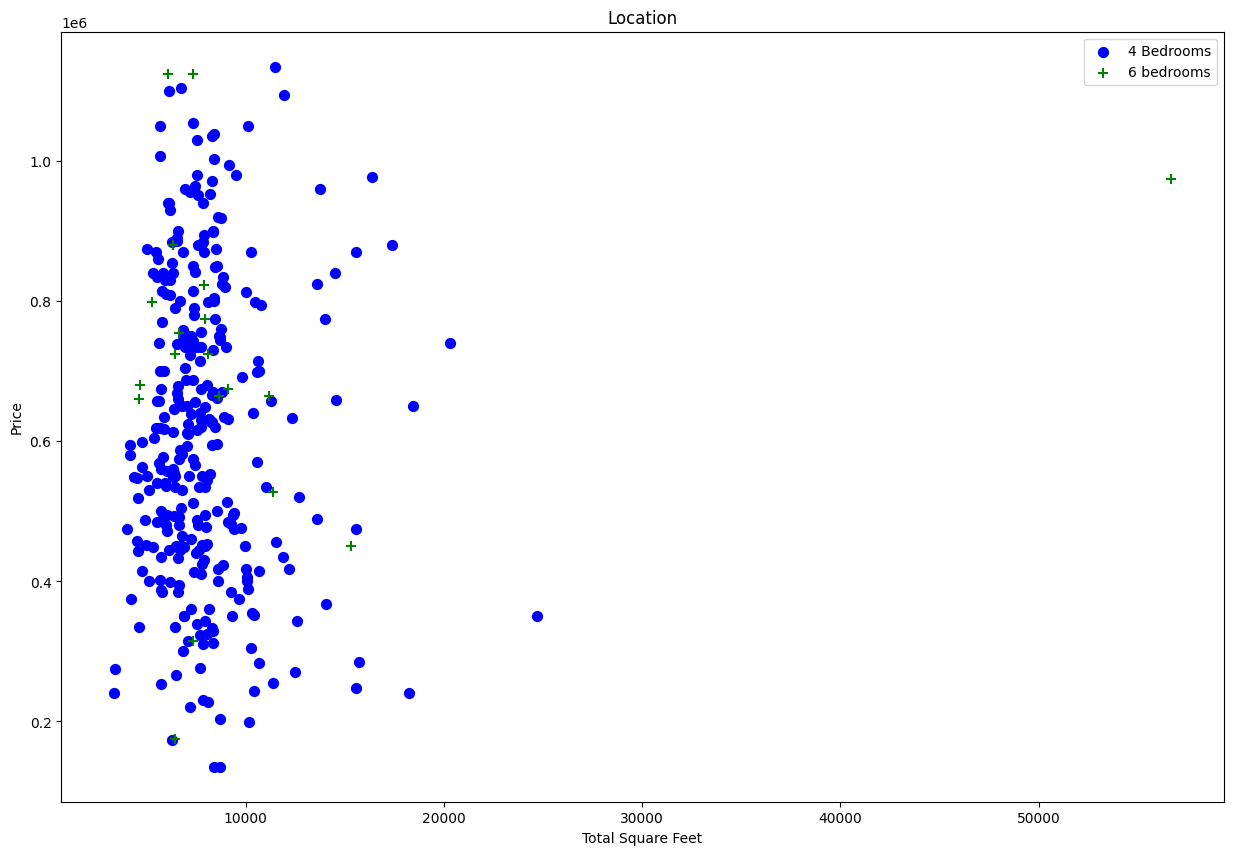

In [46]:
def plot_scatter_chart(df,city):
    br4 = df[(df6.city==city) & (df6.bedrooms==4)]
    br6 = df[(df6.city==city) & (df6.bedrooms==6)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(br4.total_square_feet,br4.price, color='Blue', label='4 Bedrooms', s=50)
    plt.scatter(br6.total_square_feet,br6.price, marker='+', color='green', label='6 bedrooms', s=50)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()
    
plot_scatter_chart(df6, 'Seattle')

## Bar Plot: Count of Bedrooms

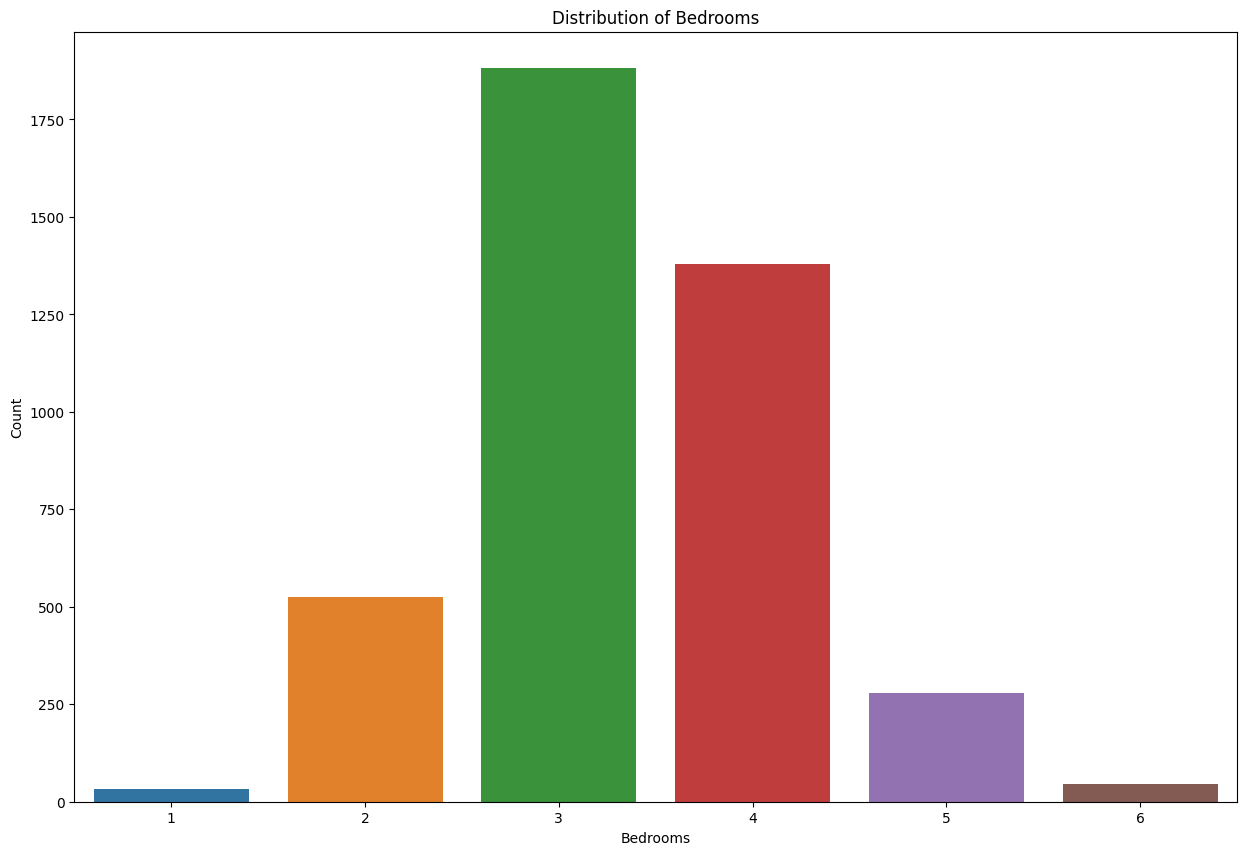

In [47]:
sn.countplot(x='bedrooms', data=df6)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms')
plt.show()

## Histogram: Distribution of Price

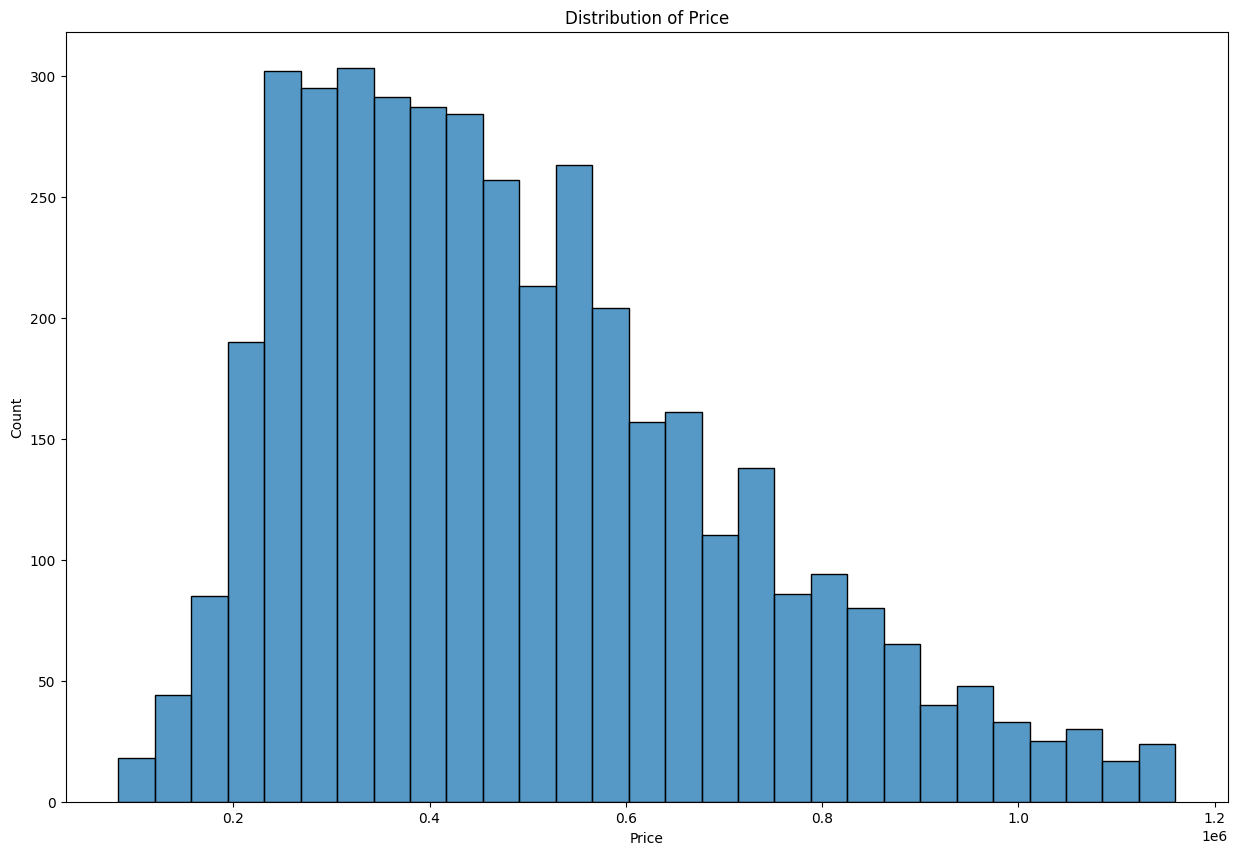

In [48]:
sn.histplot(df6['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

## Scatter Plot: Price vs. Sqft Living

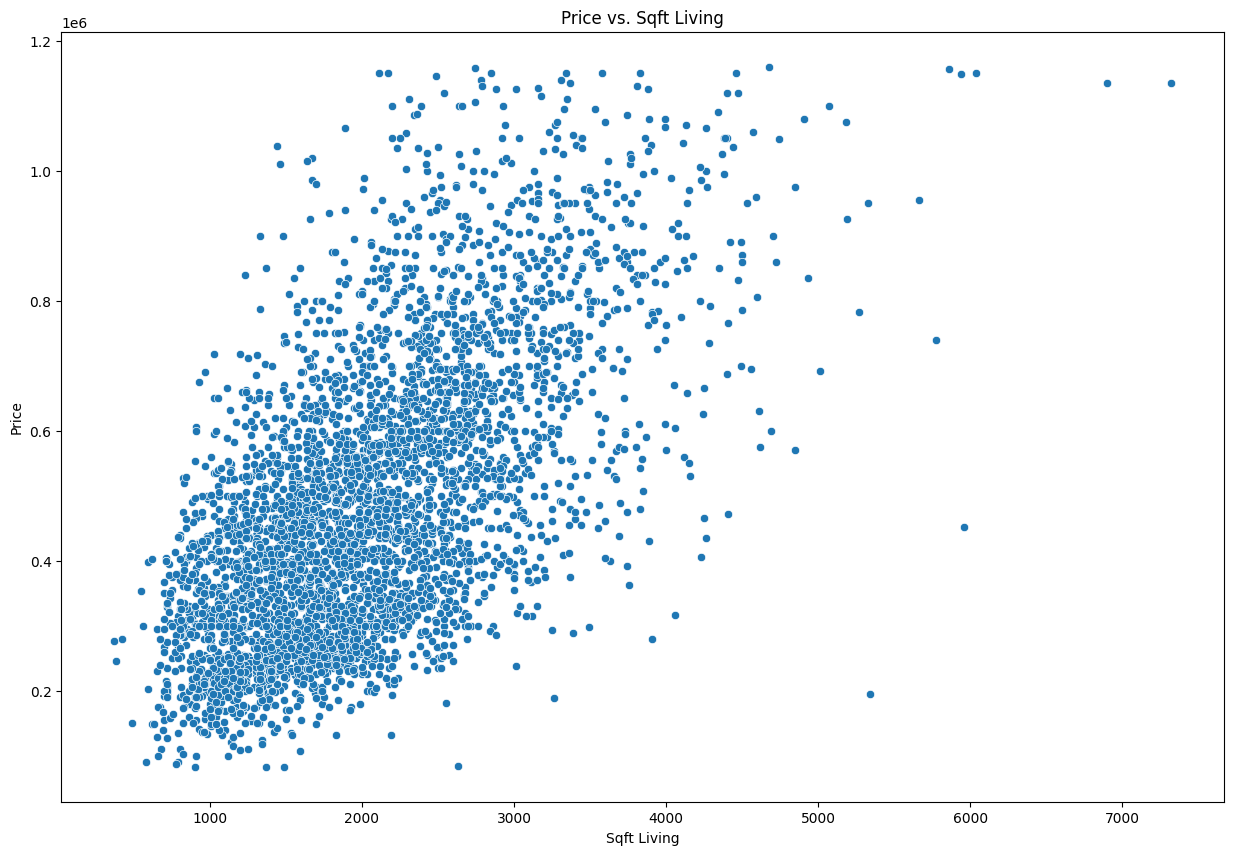

In [49]:
sn.scatterplot(x='sqft_living', y='price', data=df6)
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Price vs. Sqft Living')
plt.show()

## Box Plot: Price by Condition

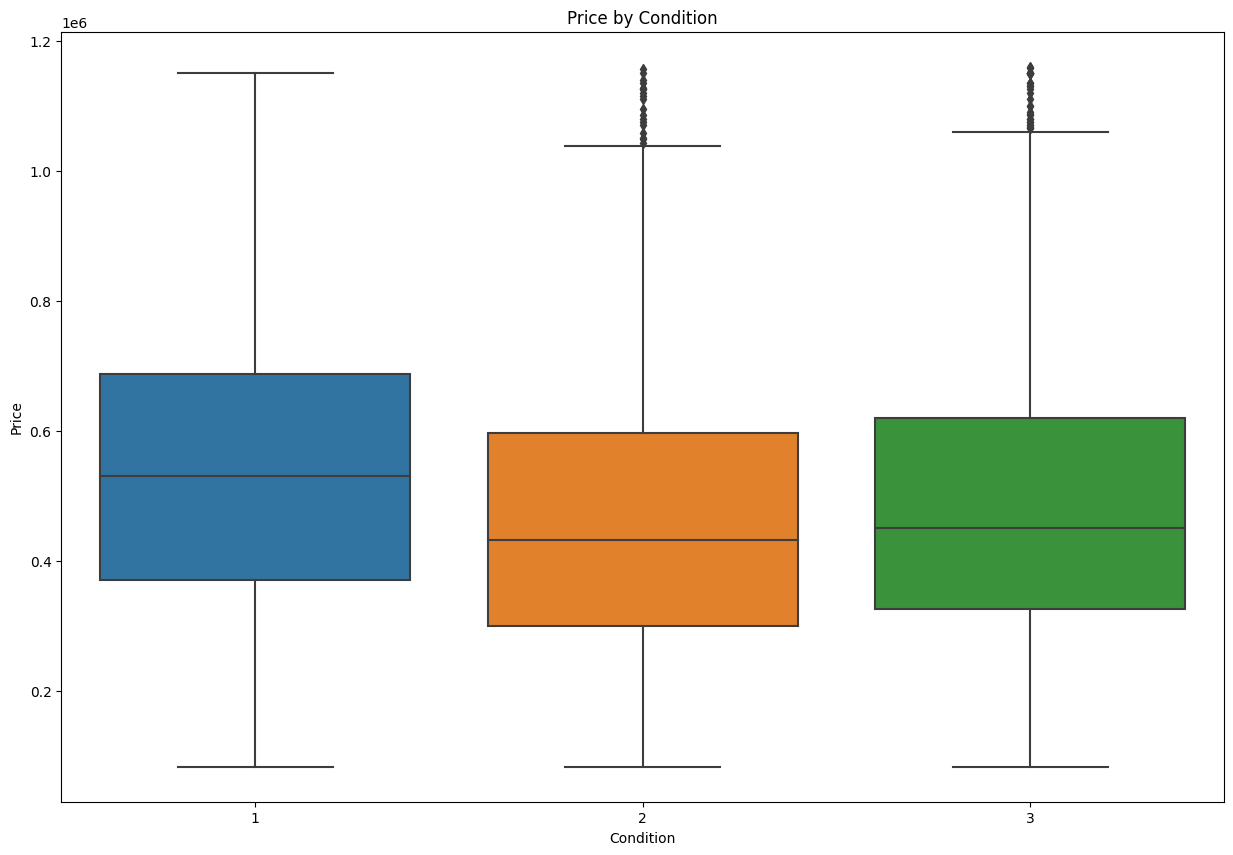

In [50]:
sn.boxplot(x='condition', y='price', data=df6)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price by Condition')
plt.show()

## Bar Plot: Total Square Footage by City

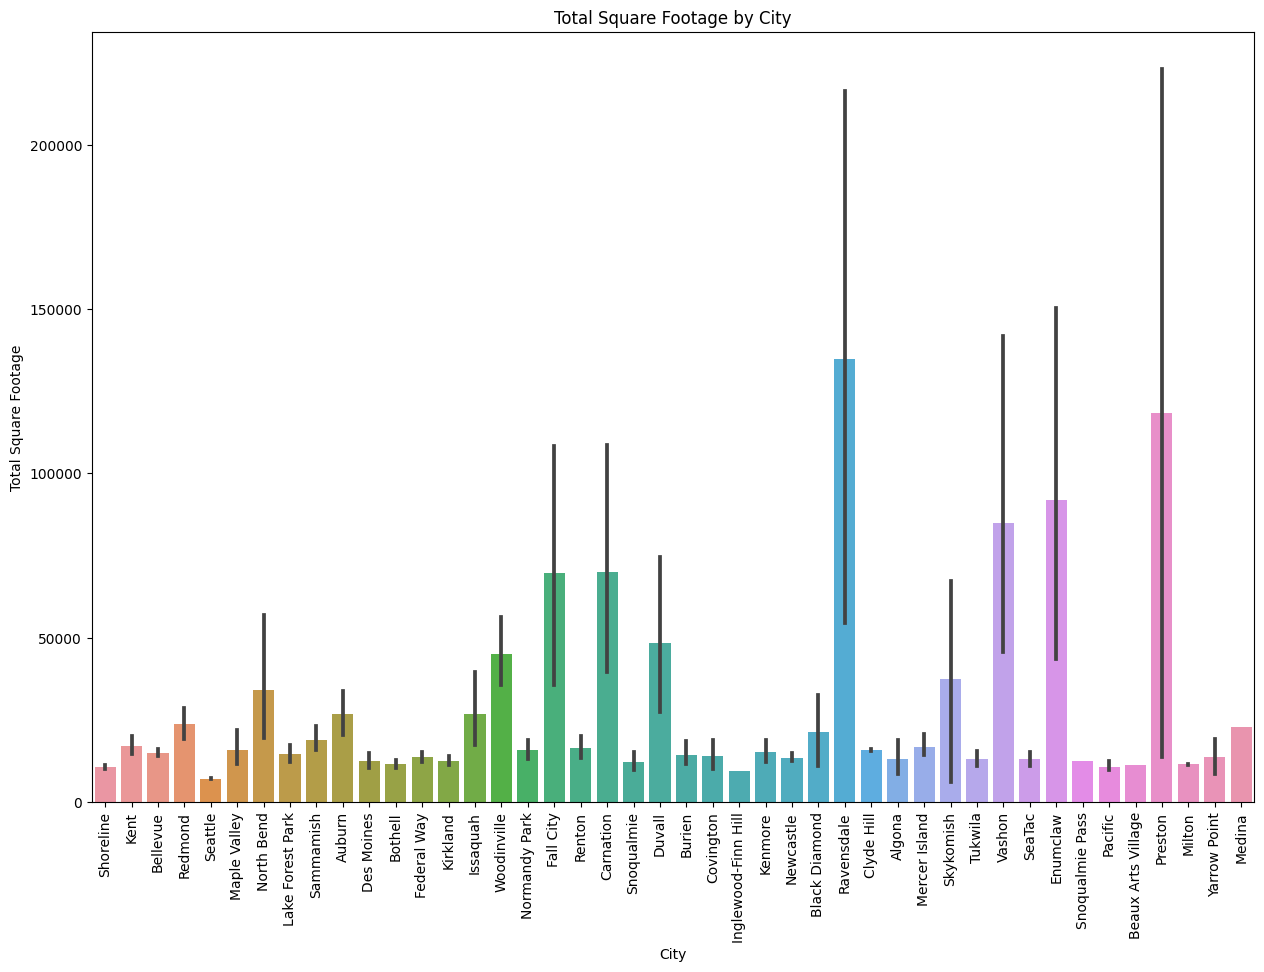

In [51]:
sn.barplot(x='city', y='total_square_feet', data=df6)
plt.xlabel('City')
plt.ylabel('Total Square Footage')
plt.title('Total Square Footage by City')
plt.xticks(rotation=90)
plt.show()

## Violin Plot: Price per Square Foot by Bedrooms

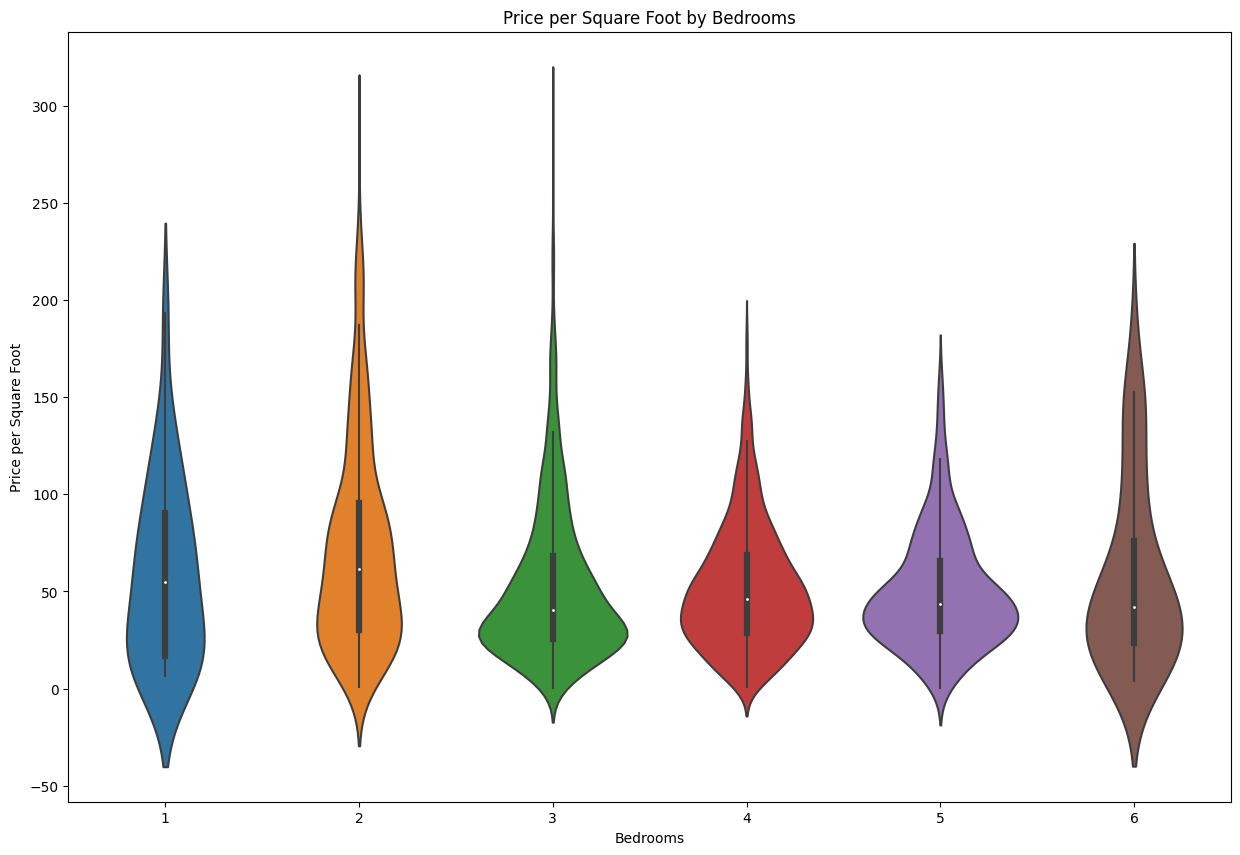

In [52]:
sn.violinplot(x='bedrooms', y='price_per_square_feet', data=df6)
plt.xlabel('Bedrooms')
plt.ylabel('Price per Square Foot')
plt.title('Price per Square Foot by Bedrooms')
plt.show()

# Using One Hot Encoding For Location(Cities)

In [53]:
dummies = pd.get_dummies(df6.city, dtype=int)
dummies.head(2)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df7 = pd.concat([df6,dummies],axis='columns')

In [55]:
df7.shape

(4144, 55)

In [56]:
df7.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,city,total_square_feet,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3,2,1340,7912,2,0,3,Shoreline,9252,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,2,Kent,13877,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df8 = df7.drop(['city','price_per_square_feet','total_square_feet'],axis='columns')

In [58]:
df8.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,Algona,Auburn,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3,2,1340,7912,2,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1,880,6380,1,0,3,0,0,...,0,1,0,0,0,0,0,0,0,0


# Building Model and Hyper Parameter Tunning

In [59]:
X = df8.drop(['price'],axis='columns')
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,Algona,Auburn,Beaux Arts Village,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3,2,1340,7912,2,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,2,1930,11947,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2000,8030,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1940,10500,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,880,6380,1,0,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
y = df8.price 

In [61]:
y

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 4144, dtype: float64

# Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

In [63]:
len(X_train)

3108

In [64]:
len(X_test)

1036

## Applying Linear Regression Model

In [65]:
lr =  LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.6711240116072386

In [66]:
y_pred = lr.predict(X_test)
y_pred

array([765810.05375056, 733232.02473775, 502343.57552749, ...,
       275524.39807709, 452593.02598649, 555349.8709406 ])

# Using K Fold cross validation to measure accuracy of our LinearRegression model

In [67]:
cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

cv_score = cross_val_score(LinearRegression(), X , y , cv=cv)

cv_score

array([0.66225479, 0.64979383, 0.65210312, 0.7081972 , 0.66447811])

In [68]:
np.average(cv_score)

0.6673654100802061

We can see that in 5 iterations we get a score above 67% all the time. No such difference, but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Finding best model using GridSearchCV

In [69]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'svr': {
            'model': SVR(gamma='auto'),
            'params': {
                'C': [1, 10, 20]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.664422,{'normalize': False}
1,lasso,0.665312,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.412272,"{'criterion': 'mse', 'splitter': 'random'}"
3,svr,-0.028248,{'C': 20}


Based on the results obtained from applying various regression models and using GridSearchCV for hyperparameter tuning, the following conclusions can be drawn:

The Lasso and linear regression model achieved the same highest best_score of 66.5% and 66.4%, indicating a better overall fit to the data compared to other models. No such difference between these two algorithms.


# Testing the model for few properties

In [70]:
def predict_price(bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft_living
    x[3] = sqft_lot
    x[4] = floors
    x[5] = waterfront
    x[6] = condition
    
    
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]


In [71]:
predicted_price = predict_price(3,2,1340,7912,2,0,3,'Shoreline')
predicted_price

353053.52946618234

In [72]:
predicted_price = predict_price(3,2,1340,7912,2,0,3,'Seattle')
predicted_price

460330.8431063853

# Exporting the tested model to a pickle file

In [73]:
import pickle
with open('washington_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

# Exporting location and column information to a file that will be useful later on in our prediction application

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

# Deployment and Integration

### 👉 Used FastAPI server as a web backend

### 👉 Built website using HTML, CSS, Bootstrap and JavaScript

### 👉 Deployment to AWS (Pending)

Kamlish@outlook.com